In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import mysql.connector
from sqlalchemy import create_engine

In [2]:
df=pd.read_csv('inventory_forecasting.csv')

In [3]:
df.shape

(109500, 15)

In [4]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0096,Toys,West,158,134,142,152.36,40.88,5,Sunny,1,42.39,Winter
1,2022-01-01,S001,P0016,Clothing,East,189,127,125,150.47,90.78,0,Rainy,0,84.16,Winter
2,2022-01-01,S001,P0031,Electronics,West,75,48,39,68.62,13.99,20,Rainy,0,12.67,Winter
3,2022-01-01,S001,P0159,Electronics,West,161,74,71,75.46,84.92,10,Snowy,0,83.03,Winter
4,2022-01-01,S001,P0129,Furniture,South,135,66,69,67.18,19.66,0,Cloudy,0,20.55,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109495,2023-12-31,S005,P0061,Clothing,South,192,96,111,133.44,94.32,15,Sunny,0,93.06,Winter
109496,2023-12-31,S005,P0085,Electronics,South,119,89,102,91.51,72.60,10,Snowy,0,79.16,Winter
109497,2023-12-31,S005,P0068,Electronics,West,131,99,95,121.82,51.38,0,Rainy,0,52.10,Winter
109498,2023-12-31,S005,P0126,Clothing,South,214,112,117,153.02,90.04,0,Sunny,0,85.16,Winter


In [5]:
plt.style.use('ggplot')
%matplotlib inline

# Load the data
df = pd.read_csv('inventory_forecasting.csv')
print(f"Data shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Data Exploration
print("\nData Info:")
print(df.info())
print("\nDescriptive Statistics:")
display(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Set up a SQLite in-memory database for analysis
inventory = create_engine('sqlite:///:memory:')
df.to_sql('inventory', inventory, index=False, if_exists='replace')

Data shape: (109500, 15)

First 5 rows:


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0096,Toys,West,158,134,142,152.36,40.88,5,Sunny,1,42.39,Winter
1,2022-01-01,S001,P0016,Clothing,East,189,127,125,150.47,90.78,0,Rainy,0,84.16,Winter
2,2022-01-01,S001,P0031,Electronics,West,75,48,39,68.62,13.99,20,Rainy,0,12.67,Winter
3,2022-01-01,S001,P0159,Electronics,West,161,74,71,75.46,84.92,10,Snowy,0,83.03,Winter
4,2022-01-01,S001,P0129,Furniture,South,135,66,69,67.18,19.66,0,Cloudy,0,20.55,Winter



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109500 entries, 0 to 109499
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                109500 non-null  object 
 1   Store ID            109500 non-null  object 
 2   Product ID          109500 non-null  object 
 3   Category            109500 non-null  object 
 4   Region              109500 non-null  object 
 5   Inventory Level     109500 non-null  int64  
 6   Units Sold          109500 non-null  int64  
 7   Units Ordered       109500 non-null  int64  
 8   Demand Forecast     109500 non-null  float64
 9   Price               109500 non-null  float64
 10  Discount            109500 non-null  int64  
 11  Weather Condition   109500 non-null  object 
 12  Holiday/Promotion   109500 non-null  int64  
 13  Competitor Pricing  109500 non-null  float64
 14  Seasonality         109500 non-null  object 
dtypes: float64(3), int64(5

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000,109500.00000,109500.000000
mean,145.705954,96.724356,96.302320,108.003150,55.023588,7.517397,0.15011,55.011232
std,48.301634,36.948147,38.630996,38.319878,25.996368,6.446679,0.35718,26.217801
min,20.000000,0.000000,20.000000,0.000000,10.000000,0.000000,0.00000,9.080000
25%,112.000000,71.000000,69.000000,81.960000,32.520000,0.000000,0.00000,32.400000
50%,143.000000,93.000000,92.000000,105.710000,54.980000,5.000000,0.00000,54.830000
75%,176.000000,118.000000,119.000000,130.940000,77.620000,10.000000,0.00000,77.362500
max,443.000000,342.000000,362.000000,337.950000,100.000000,20.000000,1.00000,109.820000



Missing Values:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


109500

In [6]:
# Query 1: Total units sold by category
query1 = """
SELECT Category, SUM("Units Sold") as Total_Sold
FROM inventory
GROUP BY Category
ORDER BY Total_Sold DESC
"""
pd.read_sql(query1, inventory)

,Category,Total_Sold
0,Clothing,4230880
1,Electronics,2577043
2,Furniture,2035351
3,Toys,1018493
4,Groceries,729550


In [7]:
# Query 2: Average inventory level by region
query2 = """
SELECT Region, AVG("Inventory Level") as Avg_Inventory
FROM inventory
GROUP BY Region
ORDER BY Avg_Inventory DESC
"""
pd.read_sql(query2, inventory)

,Region,Avg_Inventory
0,East,145.997968
1,North,145.700326
2,West,145.582209
3,South,145.540635


In [8]:
# Query 3: Sales performance by store
query3 = """
SELECT "Store ID", 
       SUM("Units Sold") as Total_Sold,
       SUM("Units Ordered") as Total_Ordered,
       SUM("Units Sold") * 1.0 / SUM("Units Ordered") as Fulfillment_Rate
FROM inventory
GROUP BY "Store ID"
ORDER BY Total_Sold DESC
"""
pd.read_sql(query3, inventory)

,Store ID,Total_Sold,Total_Ordered,Fulfillment_Rate
0,S005,2120953,2114299,1.003147
1,S003,2120159,2108851,1.005362
2,S004,2118278,2109908,1.003967
3,S002,2116629,2105999,1.005047
4,S001,2115298,2106047,1.004393


In [9]:
# Query 4: Inventory turnover by product category
query4 = """
SELECT Category,
       SUM("Units Sold") as Total_Sold,
       AVG("Inventory Level") as Avg_Inventory,
       SUM("Units Sold") / AVG("Inventory Level") as Inventory_Turnover
FROM inventory
GROUP BY Category
ORDER BY Inventory_Turnover DESC
"""
pd.read_sql(query4, inventory)

,Category,Total_Sold,Avg_Inventory,Inventory_Turnover
0,Clothing,4230880,154.570162,27371.906377
1,Electronics,2577043,137.203904,18782.577775
2,Furniture,2035351,141.703196,14363.479812
3,Toys,1018493,141.789680,7183.125016
4,Groceries,729550,148.843699,4901.450358


In [10]:
# Query 5: Products with highest and lowest turnover
query5 = """
SELECT "Product ID", Category,
       SUM("Units Sold") as Total_Sold,
       AVG("Inventory Level") as Avg_Inventory,
       SUM("Units Sold") / AVG("Inventory Level") as Inventory_Turnover
FROM inventory
GROUP BY "Product ID", Category
ORDER BY Inventory_Turnover DESC
LIMIT 10
"""
pd.read_sql(query5, inventory)

,Product ID,Category,Total_Sold,Avg_Inventory,Inventory_Turnover
0,P0046,Clothing,386805,154.506301,2503.490127
1,P0133,Clothing,385843,154.356986,2499.679537
2,P0057,Clothing,387209,155.087945,2496.705979
3,P0178,Clothing,384440,153.986575,2496.581271
4,P0187,Clothing,385583,154.869315,2489.731422
5,P0066,Clothing,384764,154.667123,2487.690931
6,P0125,Clothing,385137,154.882192,2486.644821
7,P0061,Clothing,384668,154.775342,2485.331280
8,P0069,Clothing,382968,154.473151,2479.188120
9,P0016,Clothing,384509,155.221096,2477.169729


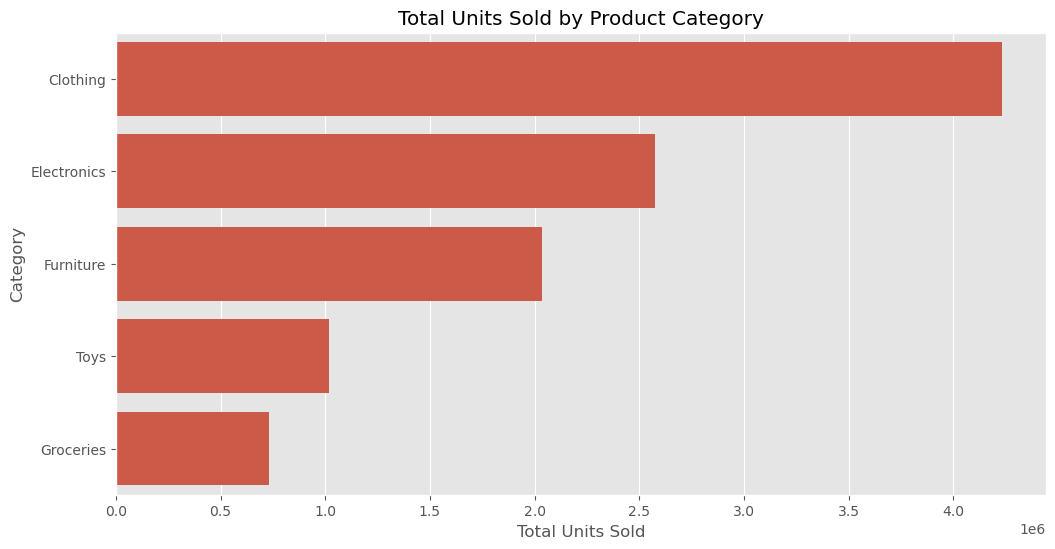

In [11]:
# Visualize sales distribution by category
plt.figure(figsize=(12, 6))
sales_by_category = pd.read_sql("""
    SELECT Category, SUM("Units Sold") as Total_Sold
    FROM inventory
    GROUP BY Category
    ORDER BY Total_Sold DESC
""", inventory)

sns.barplot(x='Total_Sold', y='Category', data=sales_by_category)
plt.title('Total Units Sold by Product Category')
plt.xlabel('Total Units Sold')
plt.ylabel('Category')
plt.show()

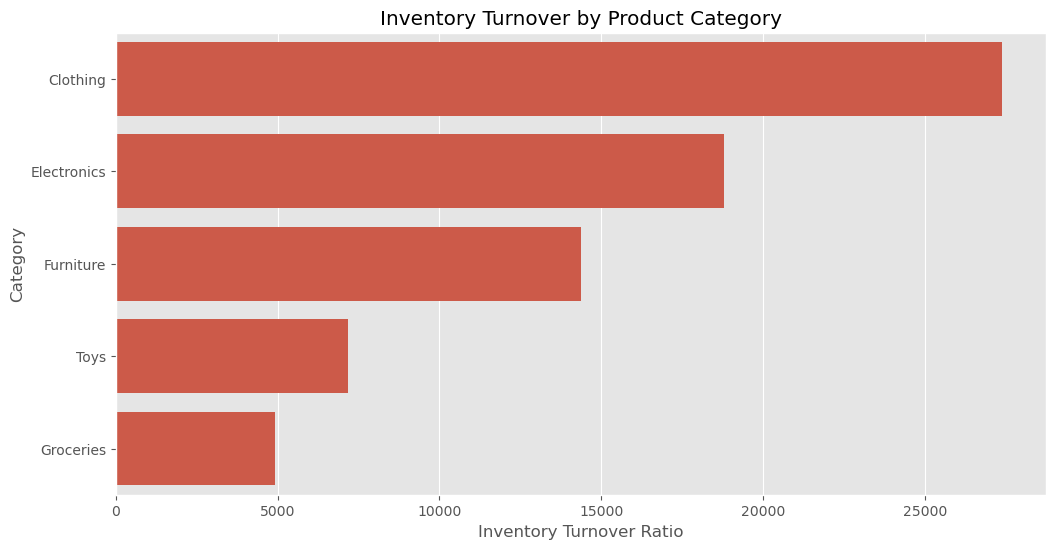

In [12]:
# Inventory turnover visualization
plt.figure(figsize=(12, 6))
turnover = pd.read_sql("""
    SELECT Category,
           SUM("Units Sold") / AVG("Inventory Level") as Inventory_Turnover
    FROM inventory
    GROUP BY Category
    ORDER BY Inventory_Turnover DESC
""", inventory)

sns.barplot(x='Inventory_Turnover', y='Category', data=turnover)
plt.title('Inventory Turnover by Product Category')
plt.xlabel('Inventory Turnover Ratio')
plt.ylabel('Category')
plt.show()

In [13]:
# Identify products that are frequently overstocked
overstocked = pd.read_sql("""
    SELECT "Product ID", Category, "Store ID",
           AVG("Inventory Level") as Avg_Inventory,
           AVG("Units Sold") as Avg_Sold,
           AVG("Inventory Level") - AVG("Units Sold") as Overstock_Amount
    FROM inventory
    GROUP BY "Product ID", Category, "Store ID"
    HAVING Overstock_Amount > 0
    ORDER BY Overstock_Amount DESC
    LIMIT 10
""", inventory)

print("Top Overstocked Products:")
display(overstocked)

Top Overstocked Products:


,Product ID,Category,Store ID,Avg_Inventory,Avg_Sold,Overstock_Amount
0,P0126,Clothing,S002,154.891781,102.958904,51.932877
1,P0116,Furniture,S002,142.305479,90.561644,51.743836
2,P0183,Electronics,S001,142.189041,90.554795,51.634247
3,P0125,Clothing,S003,158.746575,107.227397,51.519178
4,P0116,Furniture,S003,144.091781,92.783562,51.308219
5,P0070,Electronics,S005,139.864384,88.571233,51.293151
6,P0070,Electronics,S003,138.719178,87.439726,51.279452
7,P0129,Furniture,S002,143.613699,92.334247,51.279452
8,P0066,Clothing,S002,156.158904,105.180822,50.978082
9,P0171,Electronics,S005,138.802740,87.830137,50.972603


In [14]:
# Calculate potential cost savings from inventory optimization
cost_savings = pd.read_sql("""
    SELECT 
        SUM(CASE WHEN "Units Sold" > "Inventory Level" THEN 
            ("Units Sold" - "Inventory Level") * Price * 0.2 
            ELSE 0 END) as Lost_Sales_Cost,
        SUM(CASE WHEN "Inventory Level" > "Units Sold" THEN 
            ("Inventory Level" - "Units Sold") * Price * 0.1  
            ELSE 0 END) as Excess_Inventory_Cost
    FROM inventory
""", inventory)

print("Potential Cost Savings from Inventory Optimization:")
display(cost_savings)

Potential Cost Savings from Inventory Optimization:


,Lost_Sales_Cost,Excess_Inventory_Cost
0,486983.17,2.977246e+07


Stock Levels by Store and Category:


,Store ID,Category,Total_Inventory,Avg_Inventory,Unique_Products
0,S001,Clothing,1239427,154.349564,11
1,S001,Electronics,800145,137.011130,8
2,S001,Furniture,623374,142.322831,6
3,S001,Toys,308038,140.656621,3
4,S001,Groceries,217115,148.708904,2
5,S002,Clothing,1239775,154.392902,11
6,S002,Electronics,804048,137.679452,8
7,S002,Furniture,622752,142.180822,6
8,S002,Toys,313995,143.376712,3
9,S002,Groceries,217512,148.980822,2


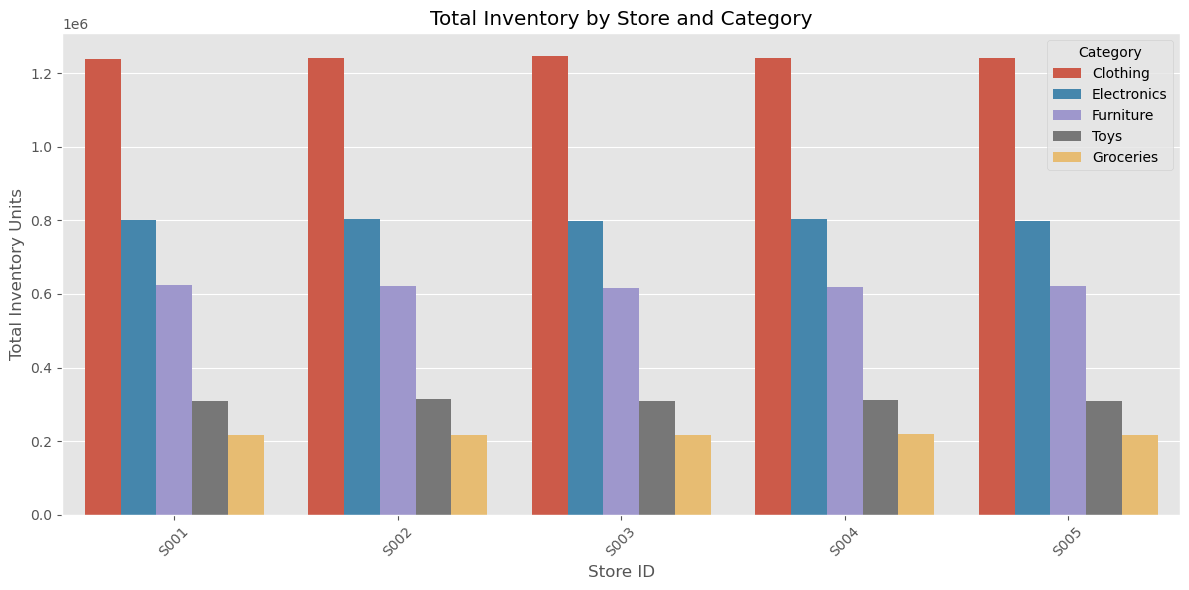

In [15]:
# Current stock levels by store and product category
query1 = """
SELECT 
    `Store ID`,
    Category,
    SUM(`Inventory Level`) as Total_Inventory,
    AVG(`Inventory Level`) as Avg_Inventory,
    COUNT(DISTINCT `Product ID`) as Unique_Products
FROM 
    inventory
GROUP BY 
    `Store ID`, Category
ORDER BY 
    `Store ID`, Total_Inventory DESC
"""

stock_levels = pd.read_sql(query1, inventory)
print("Stock Levels by Store and Category:")
display(stock_levels)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=stock_levels, x='Store ID', y='Total_Inventory', hue='Category')
plt.title('Total Inventory by Store and Category')
plt.ylabel('Total Inventory Units')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Low Inventory Items (Below 120% of Demand Forecast):


,Date,Store ID,Product ID,Category,Region,Inventory Level,Demand Forecast,Units Ordered,Stock_Status,Reorder_Quantity
0,2023-11-23,S003,P0125,Clothing,West,194,279.76,169,Low Stock,141.712
1,2022-01-23,S003,P0133,Clothing,East,197,282.17,179,Low Stock,141.604
2,2022-02-09,S004,P0046,Clothing,East,200,281.58,185,Low Stock,137.896
3,2023-02-26,S003,P0061,Clothing,East,144,233.60,132,Low Stock,136.320
4,2023-11-08,S003,P0061,Clothing,South,208,286.53,202,Low Stock,135.836
5,2023-11-16,S002,P0066,Clothing,North,179,260.45,175,Low Stock,133.540
6,2023-12-02,S003,P0016,Clothing,West,161,245.33,159,Low Stock,133.396
7,2023-11-01,S004,P0187,Clothing,West,204,280.77,197,Low Stock,132.924
8,2023-02-04,S002,P0061,Clothing,East,190,268.76,178,Low Stock,132.512
9,2023-07-22,S003,P0175,Electronics,North,190,267.32,161,Low Stock,130.784


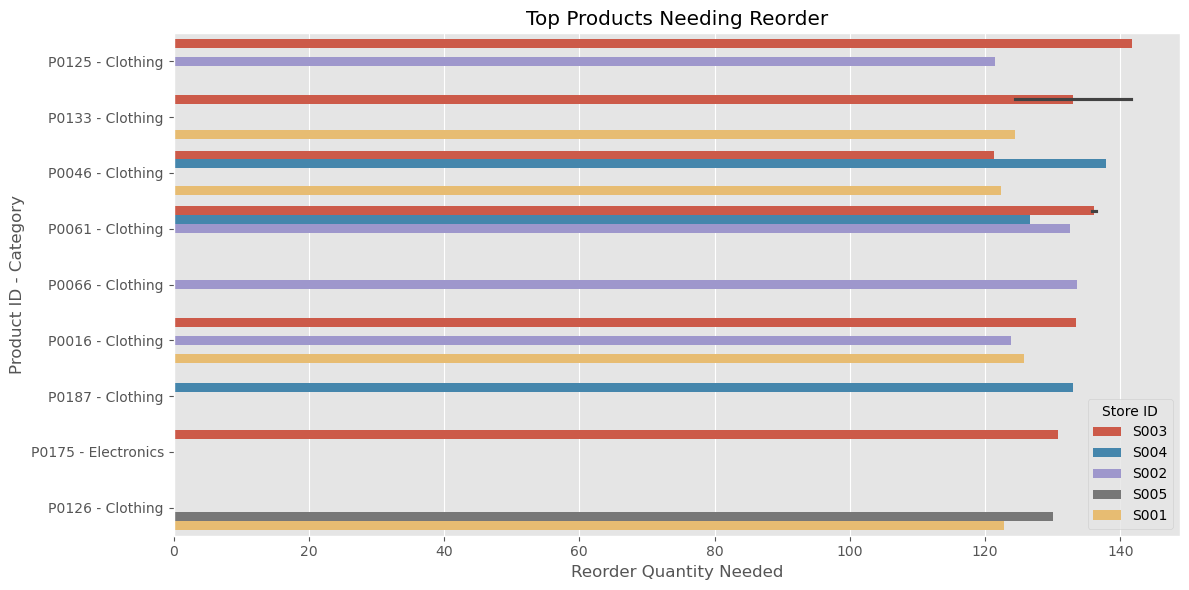

In [16]:
# Low inventory detection (inventory below demand forecast)
query2 = """
SELECT 
    Date,
    `Store ID`,
    `Product ID`,
    Category,
    Region,
    `Inventory Level`,
    `Demand Forecast`,
    `Units Ordered`,
    CASE 
        WHEN `Inventory Level` < `Demand Forecast` * 1.2 THEN 'Low Stock'
        ELSE 'Adequate Stock'
    END as Stock_Status,
    (`Demand Forecast` * 1.2 - `Inventory Level`) as Reorder_Quantity
FROM 
    inventory
WHERE 
    `Inventory Level` < `Demand Forecast` * 1.2
ORDER BY 
    Reorder_Quantity DESC
"""

low_inventory = pd.read_sql(query2, inventory)
print("\nLow Inventory Items (Below 120% of Demand Forecast):")
display(low_inventory.head(10))

# Visualization
if not low_inventory.empty:
    plt.figure(figsize=(12, 6))
    low_inventory['Product_Category'] = low_inventory['Product ID'] + " - " + low_inventory['Category']
    sns.barplot(data=low_inventory.head(20), 
                y='Product_Category', 
                x='Reorder_Quantity',
                hue='Store ID')
    plt.title('Top Products Needing Reorder')
    plt.xlabel('Reorder Quantity Needed')
    plt.ylabel('Product ID - Category')
    plt.tight_layout()
    plt.show()


Inventory Turnover by Category:


,Category,Total_Sales,Avg_Inventory,Inventory_Turnover_Ratio,Days_In_Inventory
0,Clothing,4230880,154.570162,27371.91,0.0
1,Electronics,2577043,137.203904,18782.58,0.0
2,Furniture,2035351,141.703196,14363.48,0.0
3,Toys,1018493,141.789680,7183.13,0.1
4,Groceries,729550,148.843699,4901.45,0.1


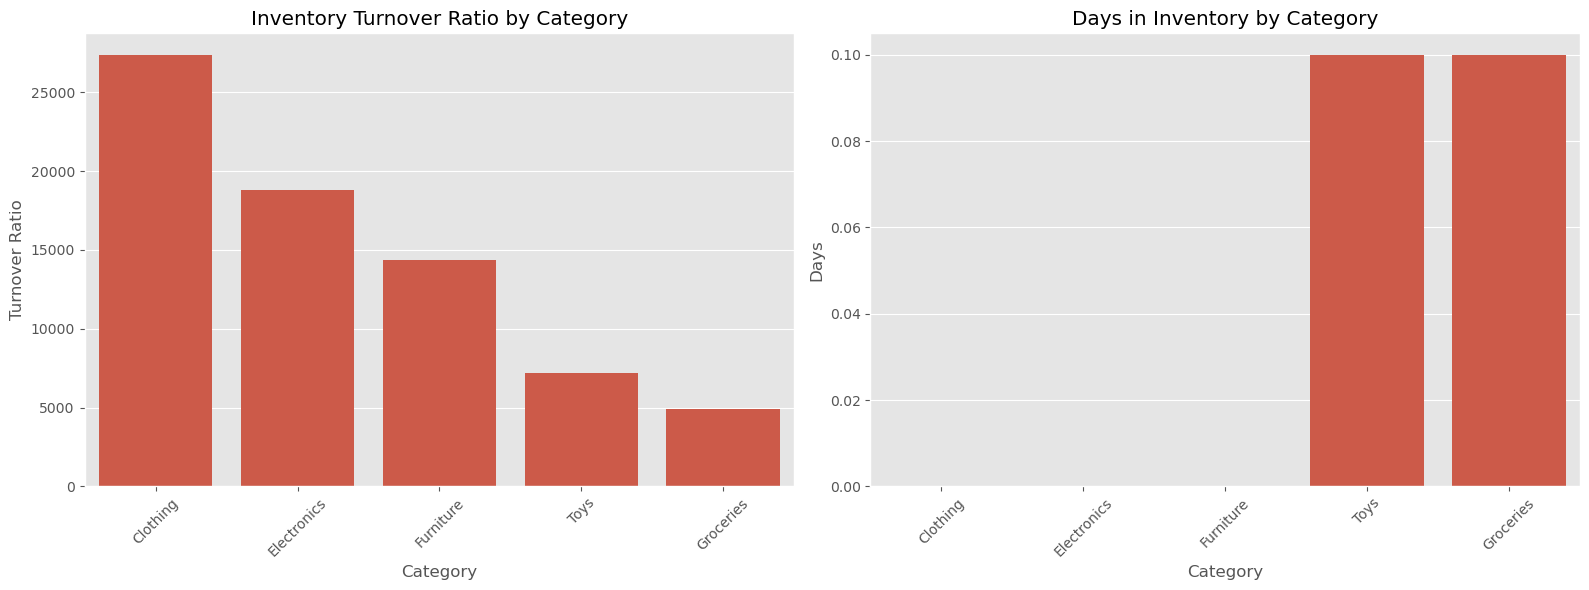

In [17]:
# Inventory turnover analysis by product category
query4 = """
SELECT 
    Category,
    SUM(`Units Sold`) as Total_Sales,
    AVG(`Inventory Level`) as Avg_Inventory,
    ROUND(SUM(`Units Sold`) / AVG(`Inventory Level`), 2) as Inventory_Turnover_Ratio,
    ROUND(365 / (SUM(`Units Sold`) / AVG(`Inventory Level`)), 1) as Days_In_Inventory
FROM 
    inventory
GROUP BY 
    Category
ORDER BY 
    Inventory_Turnover_Ratio DESC
"""

turnover = pd.read_sql(query4, inventory)
print("\nInventory Turnover by Category:")
display(turnover)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=turnover, x='Category', y='Inventory_Turnover_Ratio', ax=ax1)
ax1.set_title('Inventory Turnover Ratio by Category')
ax1.set_ylabel('Turnover Ratio')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(data=turnover, x='Category', y='Days_In_Inventory', ax=ax2)
ax2.set_title('Days in Inventory by Category')
ax2.set_ylabel('Days')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Summary KPIs by Store and Category:


,Store ID,Category,Product_Count,Total_Inventory,Avg_Inventory,Stockout_Risk_Items,Stockout_Risk_Percent,Avg_Utilization_Rate,Avg_Inventory_Age_Days,Inventory_Turnover
0,S001,Groceries,2,217115,148.708904,231,11550.0,0.062,-357.5,972.13
1,S001,Clothing,11,1239427,154.349564,1238,11254.5,0.054,-357.5,5462.97
2,S001,Toys,3,308038,140.656621,320,10666.7,0.053,-357.5,1443.66
3,S001,Furniture,6,623374,142.322831,625,10416.7,0.058,-357.5,2870.11
4,S001,Electronics,8,800145,137.011130,769,9612.5,0.052,-357.5,3765.99
5,S002,Clothing,11,1239775,154.392902,1301,11827.3,0.061,-357.5,5470.94
6,S002,Furniture,6,622752,142.180822,639,10650.0,0.050,-357.5,2851.26
7,S002,Groceries,2,217512,148.980822,210,10500.0,0.047,-357.5,972.96
8,S002,Toys,3,313995,143.376712,304,10133.3,0.056,-357.5,1426.19
9,S002,Electronics,8,804048,137.679452,783,9787.5,0.053,-357.5,3755.99


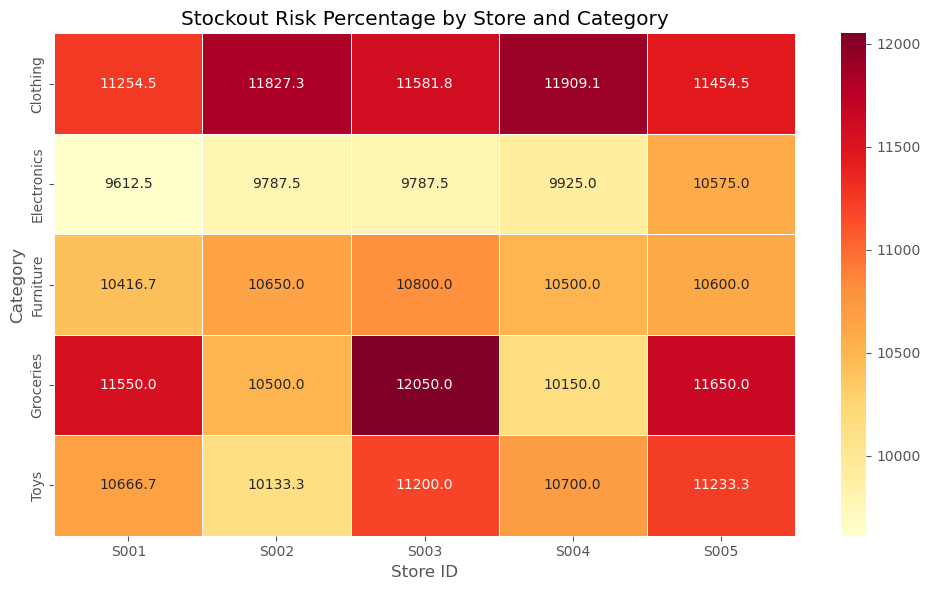

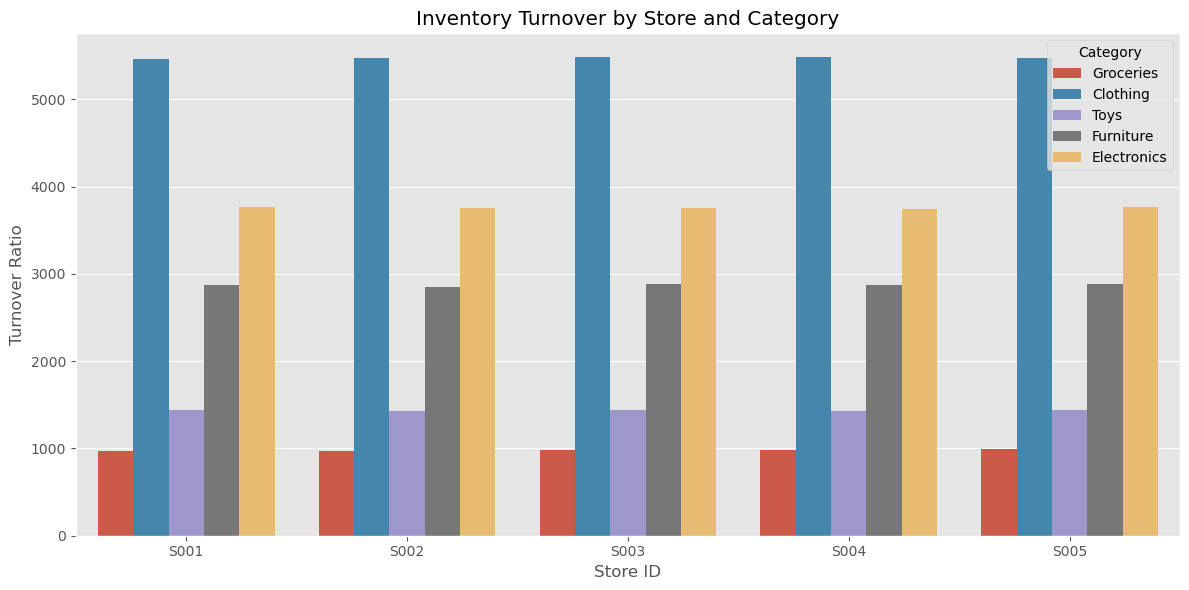

In [18]:
# Comprehensive summary report with multiple KPIs
query5 = """
SELECT 
    `Store ID`,
    Category,
    COUNT(DISTINCT `Product ID`) as Product_Count,
    SUM(`Inventory Level`) as Total_Inventory,
    AVG(`Inventory Level`) as Avg_Inventory,
    SUM(CASE WHEN `Inventory Level` < `Demand Forecast` THEN 1 ELSE 0 END) as Stockout_Risk_Items,
    ROUND(100.0 * SUM(CASE WHEN `Inventory Level` < `Demand Forecast` THEN 1 ELSE 0 END) / 
          COUNT(DISTINCT `Product ID`), 1) as Stockout_Risk_Percent,
    ROUND(AVG(`Units Sold` / `Inventory Level`), 3) as Avg_Utilization_Rate,
    ROUND(AVG(JULIANDAY('2022-01-08') - JULIANDAY(Date)), 1) as Avg_Inventory_Age_Days,
    ROUND(SUM(`Units Sold`) / AVG(`Inventory Level`), 2) as Inventory_Turnover
FROM 
    inventory
GROUP BY 
    `Store ID`, Category
ORDER BY 
    `Store ID`, Stockout_Risk_Percent DESC
"""

summary_kpis = pd.read_sql(query5, inventory)
print("\nSummary KPIs by Store and Category:")
display(summary_kpis)

# Visualization - Stockout Risk Heatmap
pivot_data = summary_kpis.pivot(index='Category', columns='Store ID', values='Stockout_Risk_Percent')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title('Stockout Risk Percentage by Store and Category')
plt.tight_layout()
plt.show()

# Visualization - Inventory Turnover by Store
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_kpis, x='Store ID', y='Inventory_Turnover', hue='Category')
plt.title('Inventory Turnover by Store and Category')
plt.ylabel('Turnover Ratio')
plt.tight_layout()
plt.show()

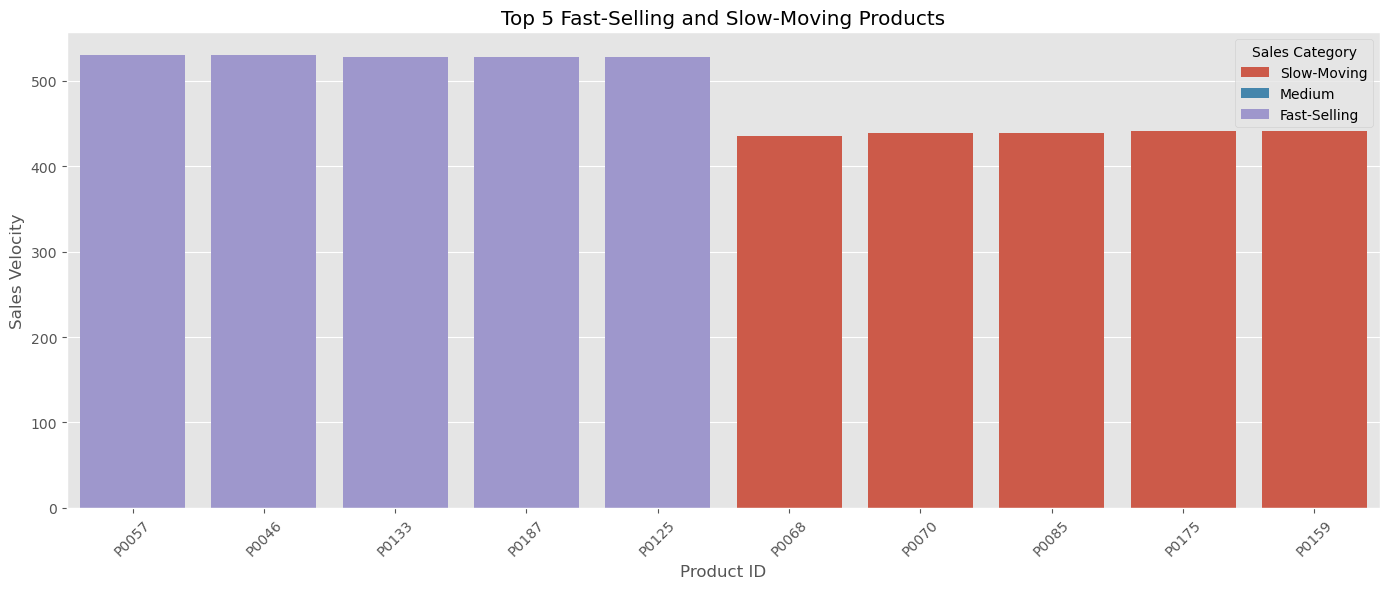


Fast-Selling Products:
   Product ID  Category  Sales Velocity
4       P0057  Clothing      530.423288
3       P0046  Clothing      529.869863
20      P0133  Clothing      528.552055
29      P0187  Clothing      528.195890
17      P0125  Clothing      527.584932
6       P0066  Clothing      527.073973
5       P0061  Clothing      526.942466
0       P0016  Clothing      526.724658
27      P0178  Clothing      526.630137
9       P0069  Clothing      524.613699

Slow-Moving Products:
   Product ID     Category  Sales Velocity
8       P0068  Electronics      435.161644
10      P0070  Electronics      438.669863
13      P0085  Electronics      438.728767
26      P0175  Electronics      441.727397
23      P0159  Electronics      441.924658
2       P0031  Electronics      442.117808
28      P0183  Electronics      445.912329
25      P0171  Electronics      445.953425
12      P0083         Toys      462.349315
21      P0149    Furniture      463.705479


In [19]:
# Calculate sales velocity (units sold per day)
product_sales = df.groupby(['Product ID', 'Category'])['Units Sold'].sum().reset_index()
product_days = df.groupby(['Product ID'])['Date'].nunique().reset_index(name='Days Tracked')
product_analysis = pd.merge(product_sales, product_days, on='Product ID')
product_analysis['Sales Velocity'] = product_analysis['Units Sold'] / product_analysis['Days Tracked']

# Classify products
product_analysis['Sales Category'] = pd.qcut(product_analysis['Sales Velocity'], 
                                           q=[0, 0.25, 0.75, 1], 
                                           labels=['Slow-Moving', 'Medium', 'Fast-Selling'])

# Top and bottom performers
top_products = product_analysis.sort_values('Sales Velocity', ascending=False).head(10)
bottom_products = product_analysis.sort_values('Sales Velocity').head(10)

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x='Product ID', y='Sales Velocity', hue='Sales Category', 
            data=pd.concat([top_products.head(5), bottom_products.head(5)]))
plt.title('Top 5 Fast-Selling and Slow-Moving Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nFast-Selling Products:")
print(top_products[['Product ID', 'Category', 'Sales Velocity']])
print("\nSlow-Moving Products:")
print(bottom_products[['Product ID', 'Category', 'Sales Velocity']])

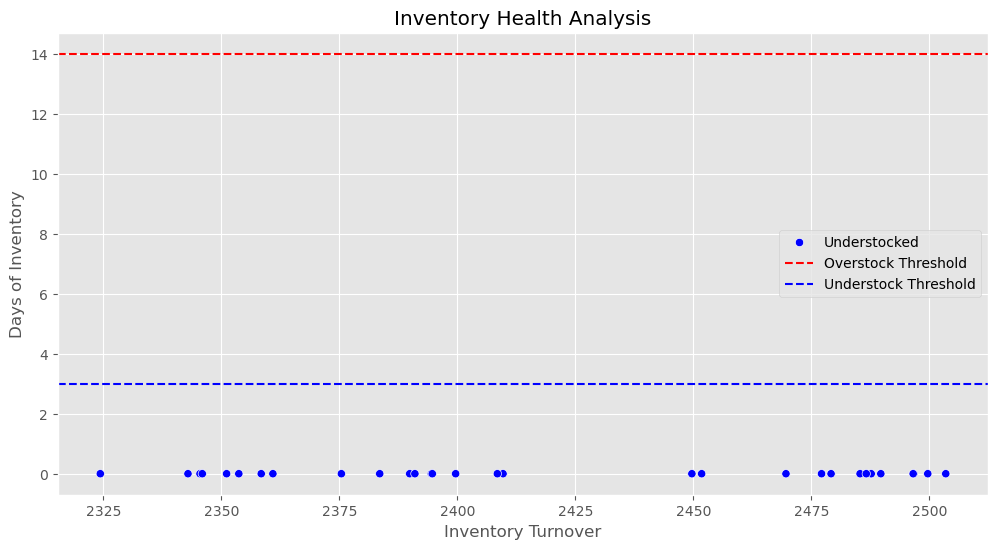


Overstocked Products (Reducing recommended):
Empty DataFrame
Columns: [Product ID, Category, Days of Inventory]
Index: []

Understocked Products (Increasing recommended):
   Product ID  Category  Days of Inventory
3       P0046  Clothing           0.002796
20      P0133  Clothing           0.002800
4       P0057  Clothing           0.002804
27      P0178  Clothing           0.002804
29      P0187  Clothing           0.002812
6       P0066  Clothing           0.002814
17      P0125  Clothing           0.002815
5       P0061  Clothing           0.002817
9       P0069  Clothing           0.002824
0       P0016  Clothing           0.002826


In [20]:
# Calculate inventory turnover and days of inventory
product_inventory = df.groupby(['Product ID', 'Category']).agg({
    'Inventory Level': 'mean',
    'Units Sold': 'sum'
}).reset_index()
product_inventory['Inventory Turnover'] = product_inventory['Units Sold'] / product_inventory['Inventory Level']
product_inventory['Days of Inventory'] = product_inventory['Inventory Level'] / (product_inventory['Units Sold'] / 7)  # Assuming 7 days of data

# Identify overstocked and understocked products
product_inventory['Stock Status'] = np.where(
    product_inventory['Days of Inventory'] > 14, 'Overstocked',
    np.where(product_inventory['Days of Inventory'] < 3, 'Understocked', 'Balanced')
)

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Inventory Turnover', y='Days of Inventory', hue='Stock Status', 
                data=product_inventory, palette={'Overstocked': 'red', 'Understocked': 'blue', 'Balanced': 'green'})
plt.axhline(y=14, color='r', linestyle='--', label='Overstock Threshold')
plt.axhline(y=3, color='b', linestyle='--', label='Understock Threshold')
plt.title('Inventory Health Analysis')
plt.legend()
plt.show()

print("\nOverstocked Products (Reducing recommended):")
print(product_inventory[product_inventory['Stock Status'] == 'Overstocked'].sort_values('Days of Inventory', ascending=False)[['Product ID', 'Category', 'Days of Inventory']].head(10))
print("\nUnderstocked Products (Increasing recommended):")
print(product_inventory[product_inventory['Stock Status'] == 'Understocked'].sort_values('Days of Inventory')[['Product ID', 'Category', 'Days of Inventory']].head(10))

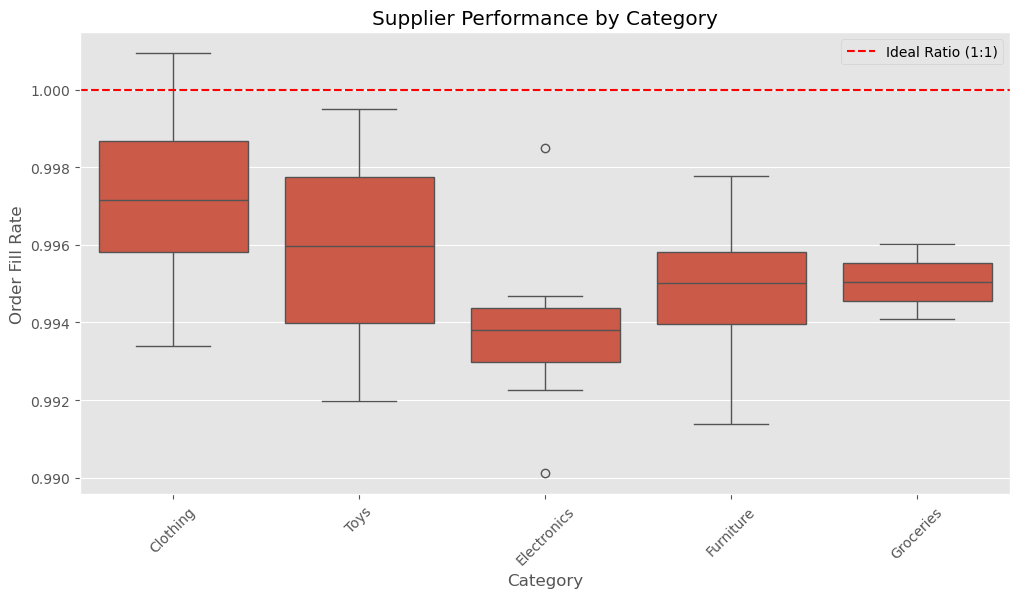


Underperforming Suppliers (Low Order Fill Rate):
Empty DataFrame
Columns: [Product ID, Category, Order Fill Rate]
Index: []

Overperforming Suppliers (Potential Overordering):
Empty DataFrame
Columns: [Product ID, Category, Order Fill Rate]
Index: []


In [21]:
# Assuming 'Units Ordered' reflects supplier performance (higher is better)
supplier_performance = df.groupby(['Product ID', 'Category']).agg({
    'Units Ordered': 'sum',
    'Units Sold': 'sum'
}).reset_index()
supplier_performance['Order Fill Rate'] = supplier_performance['Units Ordered'] / supplier_performance['Units Sold']

# Identify inconsistent suppliers
supplier_performance['Performance Category'] = pd.cut(supplier_performance['Order Fill Rate'],
                                                     bins=[0, 0.8, 1.2, float('inf')],
                                                     labels=['Underperforming', 'Adequate', 'Overperforming'])

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Order Fill Rate', data=supplier_performance)
plt.axhline(y=1, color='r', linestyle='--', label='Ideal Ratio (1:1)')
plt.title('Supplier Performance by Category')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("\nUnderperforming Suppliers (Low Order Fill Rate):")
print(supplier_performance[supplier_performance['Performance Category'] == 'Underperforming'].sort_values('Order Fill Rate')[['Product ID', 'Category', 'Order Fill Rate']].head(10))
print("\nOverperforming Suppliers (Potential Overordering):")
print(supplier_performance[supplier_performance['Performance Category'] == 'Overperforming'].sort_values('Order Fill Rate', ascending=False)[['Product ID', 'Category', 'Order Fill Rate']].head(10))